In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Dados carregados com 11 linhas e 10 colunas.


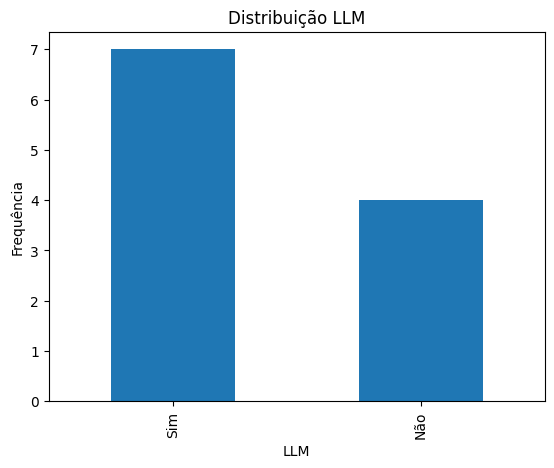

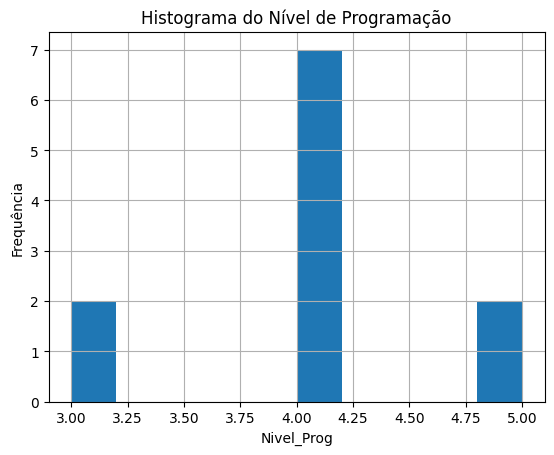

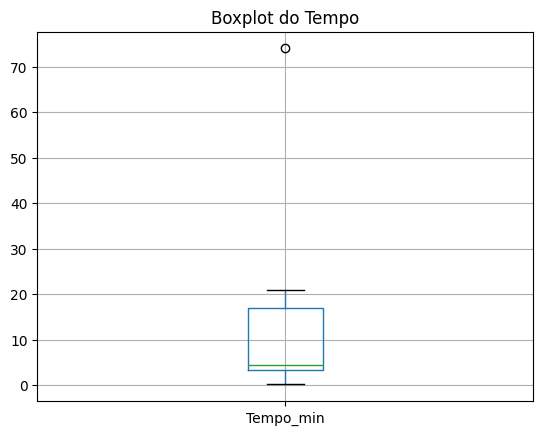

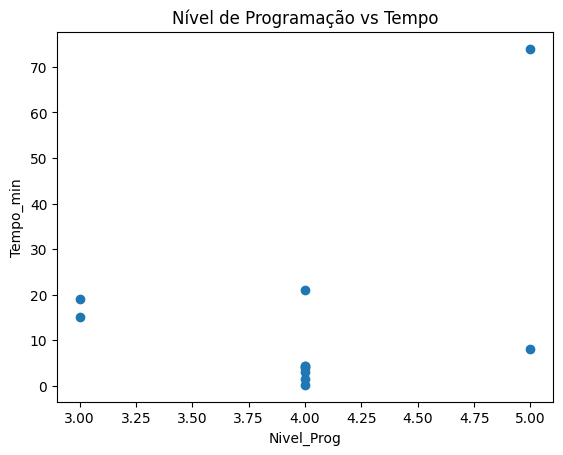

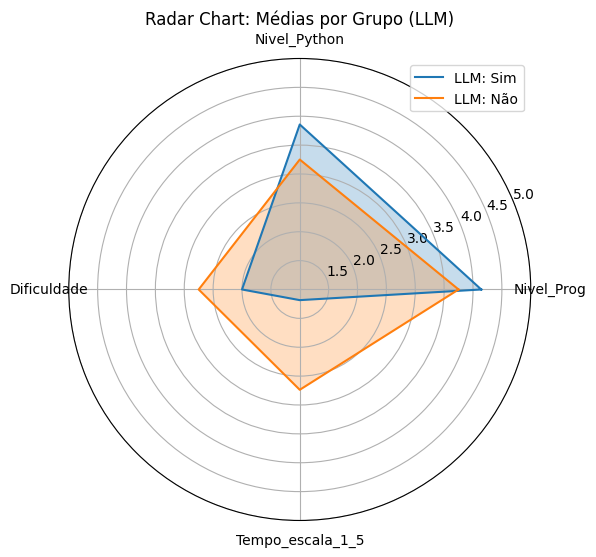

In [2]:


def carregar_dados(caminho_csv, sep=';'):
    df = pd.read_csv(caminho_csv, sep=sep)
    print(f'Dados carregados com {df.shape[0]} linhas e {df.shape[1]} colunas.')
    return df

def grafico_barras(df, coluna, titulo='Gráfico de Barras', xlabel='', ylabel='Frequência'):
    counts = df[coluna].value_counts()
    counts.plot(kind='bar')
    plt.title(titulo)
    plt.xlabel(xlabel if xlabel else coluna)
    plt.ylabel(ylabel)
    plt.show()

def histograma(df, coluna, bins=10, titulo='Histograma'):
    df[coluna].hist(bins=bins)
    plt.title(titulo)
    plt.xlabel(coluna)
    plt.ylabel('Frequência')
    plt.show()

def boxplot(df, coluna, titulo='Boxplot'):
    df.boxplot(column=coluna)
    plt.title(titulo)
    plt.show()

def scatter_plot(df, x_col, y_col, titulo='Scatter Plot'):
    plt.scatter(df[x_col], df[y_col])
    plt.title(titulo)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

def radar_chart(df, grupo_col, variaveis, grupo_valores, escala_min=1, escala_max=5, titulo='Radar Chart'):
    # Calcular médias por grupo
    medias = {}
    for valor in grupo_valores:
        medias[valor] = df[df[grupo_col] == valor][variaveis].mean()
    
    angles = np.linspace(0, 2 * np.pi, len(variaveis), endpoint=False).tolist()
    angles += angles[:1]  # Fechar o círculo

    fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))

    for valor, media in medias.items():
        dados = media.tolist()
        dados += dados[:1]
        ax.plot(angles, dados, label=f'{grupo_col}: {valor}')
        ax.fill(angles, dados, alpha=0.25)
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(variaveis)
    ax.set_title(titulo)
    ax.set_ylim(escala_min, escala_max)
    ax.legend(loc='upper right')
    plt.show()

# Exemplo de uso:
if __name__ == '__main__':
    # Carregar o arquivo
    df = carregar_dados('Quest.csv')

    # Converter 'Tempo' para minutos (opcional)
    if 'Tempo' in df.columns:
        df['Tempo_min'] = pd.to_timedelta(df['Tempo']).dt.total_seconds() / 60

    # Exemplo de gráficos:
    grafico_barras(df, 'LLM', titulo='Distribuição LLM')
    histograma(df, 'Nivel_Prog', titulo='Histograma do Nível de Programação')
    boxplot(df, 'Tempo_min', titulo='Boxplot do Tempo')
    scatter_plot(df, 'Nivel_Prog', 'Tempo_min', titulo='Nível de Programação vs Tempo')

    # Radar Chart
    df['LLM_num'] = df['LLM'].map({'Sim': 1, 'Não': 0})
    # Criar uma coluna com tempo na escala 1-5
    tempo_min = df['Tempo_min'].min()
    tempo_max = df['Tempo_min'].max()
    df['Tempo_escala_1_5'] = 1 + (df['Tempo_min'] - tempo_min) * (5 - 1) / (tempo_max - tempo_min)

    radar_chart(
        df,
        grupo_col='LLM',
        variaveis=['Nivel_Prog', 'Nivel_Python', 'Dificuldade', 'Tempo_escala_1_5'],
        grupo_valores=['Sim', 'Não'],
        titulo='Radar Chart: Médias por Grupo (LLM)'
    )